# Maximizing Customer Retention: Fairway Bank (Data Wrangling)

Fairway Bank seeks to reduce customer churn from 20% to 10%. They have provided us with this __[dataset](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)__ of 10,000 customers. We will determine which features contribute to customer churn and build a classification model to predict churn. First, we must ensure that the dataset is clean and ready for use. Each row represents a customer, and the columns are defined as follows:

- **RowNumber:** unique serial number
- **CustomerId:** unique customer number
- **Surname:** surname of customer
- **CreditScore:** credit score of customer
- **Geography:** country of customer
- **Gender:** gender of customer
- **Age:** age of customer
- **Tenure:** number of years that the customer has been a client of the bank
- **Balance:** balance in credit card
- **NumOfProducts:** number of products that a customer has purchased through the bank
- **HasCrCard:** whether or not a customer has a credit card
- **IsActiveMember:** whether or not customer is active
- **EstimatedSalary:** estimated salary of customer
- **Exited:** whether or not the customer left the bank
- **Complain:** whether or not the customer filed a complaint
- **Satisfaction Score:** score provided by the customer for their complaint resolution
- **Card Type:** type of card held by the customer
- **Points Earned:** the points earned by the customer for using credit card

## Load Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [18]:
df = pd.read_csv('bank.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Clean Data

In [37]:
# Check for missing values; examine data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

There are no missing values in the dataset. All columns of are of the correct data type, however, later we will convert categorical columns into numeric for modeling.

In [35]:
# Check for duplicates
df[df.duplicated() == True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [36]:
df[df['CustomerId'].duplicated() == True]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


There are no duplicates in the dataset.

In [38]:
# Drop unneccessary columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [39]:
# Rename target column 'Churn'
df.rename(columns={'Exited': 'Churn'}, inplace=True)

## Explore Distributions

In [45]:
# Explore categorical features
print('\'Geography\' unique values:', df['Geography'].unique())
print('\'Gender\' unique values:', df['Gender'].unique())
print('\'Card Type\' unique values:', df['Card Type'].unique())

'Geography' unique values: ['France' 'Spain' 'Germany']
'Gender' unique values: ['Female' 'Male']
'Card Type' unique values: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


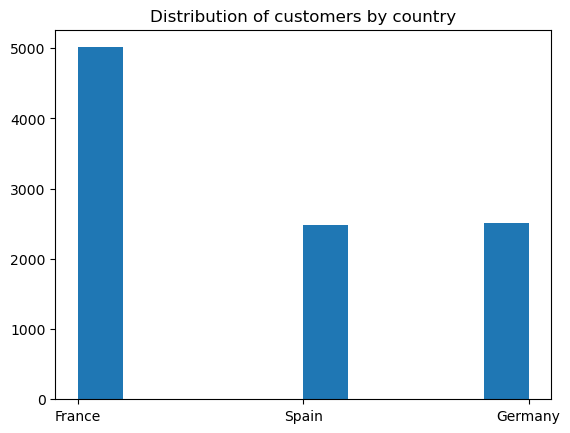

In [144]:
df['Geography'].hist(grid=False);
plt.title('Distribution of customers by country');

About half of the customers are in France, with about 1/4 in Spain and Germany.

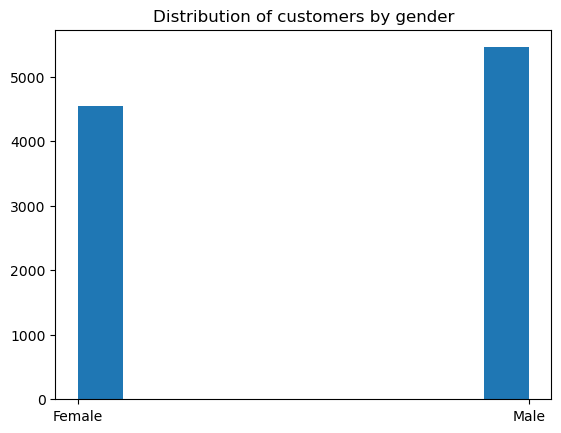

In [63]:
df['Gender'].hist(grid=False);
plt.title('Distribution of customers by gender');

About 4,500 customers are female and 5,500 are male.

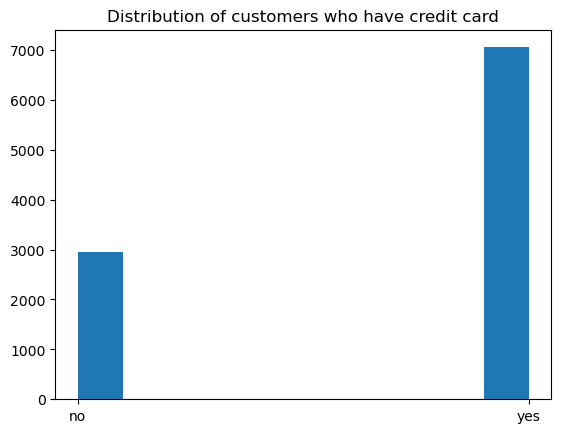

In [213]:
ax = df['HasCrCard'].hist(grid=False);
plt.xticks([0,1])
ax.set_xticklabels(['no', 'yes'])
plt.title('Distribution of customers who have credit card');

About 7/10 customers have a credit card.

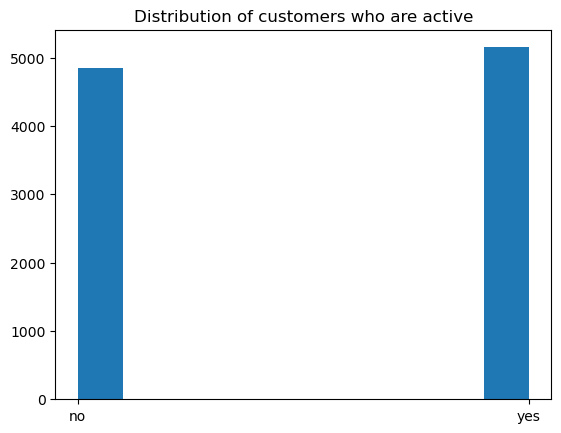

In [214]:
ax = df['IsActiveMember'].hist(grid=False);
plt.xticks([0,1])
ax.set_xticklabels(['no', 'yes'])
plt.title('Distribution of customers who are active');

About half of the customers are active.

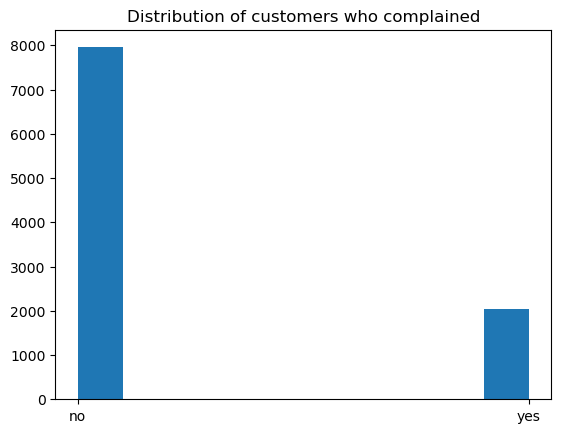

In [218]:
ax = df['Complain'].hist(grid=False);
plt.xticks([0,1])
ax.set_xticklabels(['no', 'yes'])
plt.title('Distribution of customers who complained');

About 1/5 customers complained.

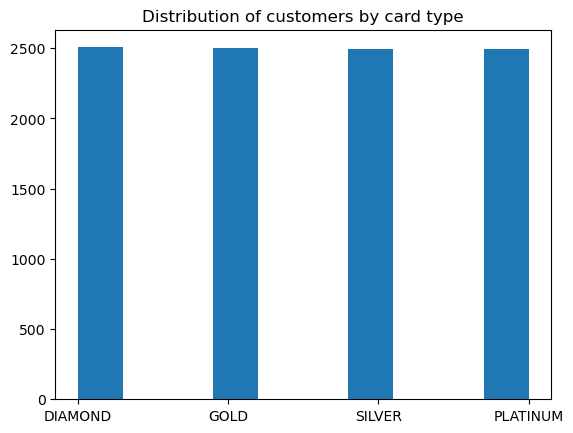

In [64]:
df['Card Type'].hist(grid=False);
plt.title('Distribution of customers by card type');

Card type is evenly distributed with about 1/4 customers per each of the 4 card types.

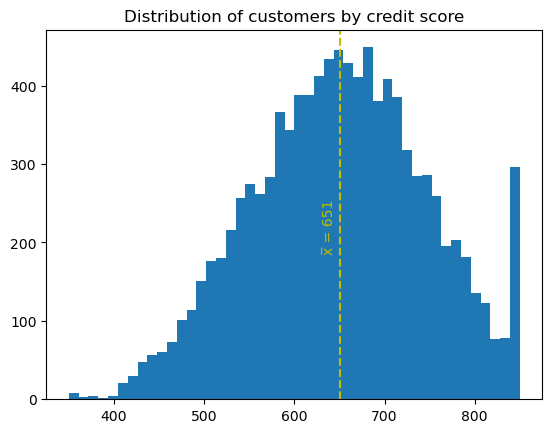

In [160]:
# Explore numerical features
CreditScore_mean = round(df['CreditScore'].mean())
ax = df['CreditScore'].hist(bins=int(df['CreditScore'].nunique()/10), grid=False);
plt.title('Distribution of customers by credit score');
ax.axvline(x=CreditScore_mean, linestyle='dashed', c='y');
plt.text(CreditScore_mean - 20, ax.get_ylim()[1] * 0.4, f'x̅ = {CreditScore_mean}', c='y', rotation=90);

Credit score follows a fairly normal distribution, with a mean of 651 and a spike in the number of customers with a high credit score around 850.

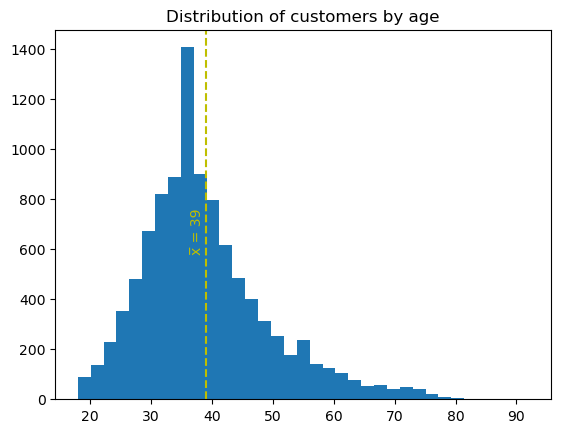

In [166]:
Age_mean = round(df['Age'].mean())
ax = df['Age'].hist(bins=int(df['Age'].nunique()/2), grid=False);
plt.title('Distribution of customers by age');
ax.axvline(x=Age_mean, linestyle='dashed', c='y');
plt.text(Age_mean - 2.5, ax.get_ylim()[1] * 0.4, f'x̅ = {Age_mean}', c='y', rotation=90);

Age is right skewed with a mean of 39 years old. 

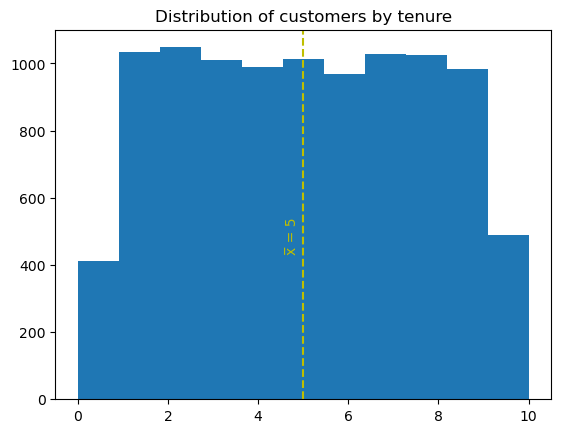

In [167]:
Tenure_mean = round(df['Tenure'].mean())
ax = df['Tenure'].hist(bins=df['Tenure'].nunique(), grid=False);
plt.title('Distribution of customers by tenure');
ax.axvline(x=Tenure_mean, linestyle='dashed', c='y');
plt.text(Tenure_mean - 0.4, ax.get_ylim()[1] * 0.4, f'x̅ = {Tenure_mean}', c='y', rotation=90);

Tenure is close to a uniform distribution between 1 and 9 years inclusive, with about half as many customers who have been with Fairway for 0 or 10 years. The mean is 5 years.

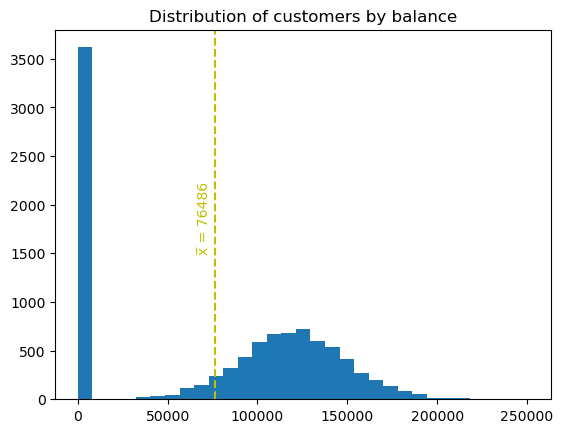

In [185]:
Balance_mean = round(df['Balance'].mean())
ax = df['Balance'].hist(bins=int(df['Balance'].nunique()/200), grid=False);
plt.title('Distribution of customers by balance');
ax.axvline(x=Balance_mean, linestyle='dashed', c='y');
plt.text(Balance_mean - 10000, ax.get_ylim()[1] * 0.4, f'x̅ = {Balance_mean}', c='y', rotation=90);

Over 1/3 of the customers have a balance of €0, pulling the mean balance to €76.486 (note the period here refers to the 'thousands' rather than a decimal, as in seventy-six thousand four hundred and eighty-six euro). The other customer balances follow a normal distribution centered around about €12.500. We need to consider if these 0's represent missing values, or if 1/3 of customers really have a balance of €0. We will review this further in Exploratory Data Analysis when we look at correlations.

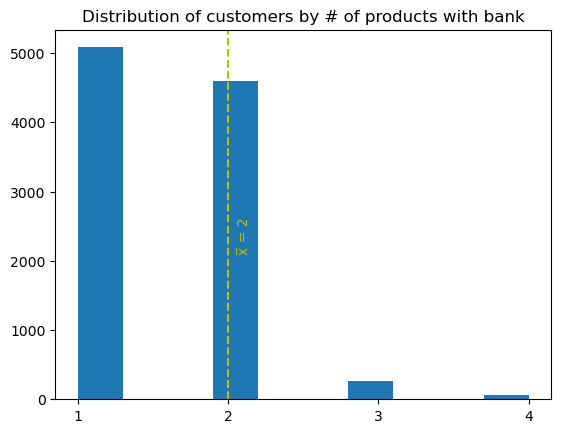

In [202]:
NumOfProducts_mean = round(df['NumOfProducts'].mean())
ax = df['NumOfProducts'].hist(grid=False);
plt.xticks([1,2,3,4])
plt.title('Distribution of customers by # of products with bank');
ax.axvline(x=NumOfProducts_mean, linestyle='dashed', c='y');
plt.text(NumOfProducts_mean + 0.06, ax.get_ylim()[1] * 0.4, f'x̅ = {NumOfProducts_mean}', c='y', rotation=90);

Over 9/10 customers have either 1 or 2 products with the bank, with few having 3 or 4 products.

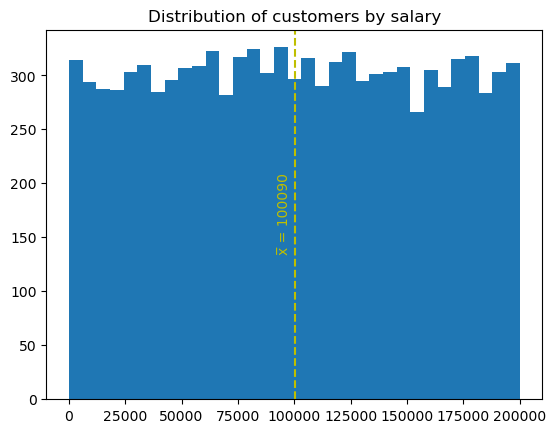

In [230]:
EstimatedSalary_mean = round(df['EstimatedSalary'].mean())
ax = df['EstimatedSalary'].hist(bins=int(df['EstimatedSalary'].nunique()/300), grid=False);
plt.title('Distribution of customers by salary');
ax.axvline(x=EstimatedSalary_mean, linestyle='dashed', c='y');
plt.text(EstimatedSalary_mean - 8_000, ax.get_ylim()[1] * 0.4, f'x̅ = {EstimatedSalary_mean}', c='y', rotation=90);

Customers' estimated salary follows a relatively uniform distribution from about €0 to €200.000 with a mean of about €100.000.

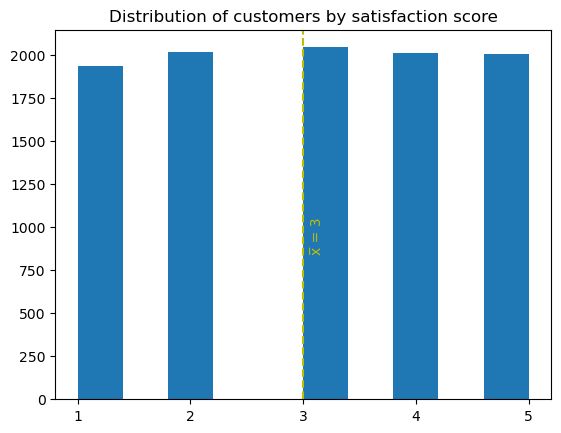

In [236]:
Satisfaction_Score_mean = round(df['Satisfaction Score'].mean())
ax = df['Satisfaction Score'].hist(grid=False);
plt.xticks([1,2,3,4,5])
plt.title('Distribution of customers by satisfaction score');
ax.axvline(x=Satisfaction_Score_mean, linestyle='dashed', c='y');
plt.text(Satisfaction_Score_mean + 0.06, ax.get_ylim()[1] * 0.4, f'x̅ = {Satisfaction_Score_mean}', c='y', rotation=90);

Customer satisfaction scores follow a relatively uniform distribution with about 1/5 customers reporting each score from 1-5 and a resultant mean score of 3. This raises the need for an interpretation of what this report represents. The data source indicates that Satisfaction Score represents a score provided by the customer for complaint resolution. With only about 1/5 customers having complained, in theory there would only be as many values for this column as there were 'yes' values in the Complain column. Alternatively, 1/5 satisfaction scores would vary (for those who filed a complaint), with the other 4/5 defaulting to the highest value (for customers who didn't complain). The fact that these values vary uniformly for all 10,000 customers in the sample, indicates that perhaps customers interpreted this score to indicate their overall satisfaction with the bank, regardless of whether or not they filed a complaint. Moreover, we don't know if 1 or 5 refers to optimum satisfaction. In the real world we would need to consult with stakeholders to better understand how to interpret this column, but in the case here where we have to finalize reports in advance of further consulting, we will have to make some of our own interpretations. We'll dig deeper into this interpretation when we get to the official Exploratory Data Analyis.

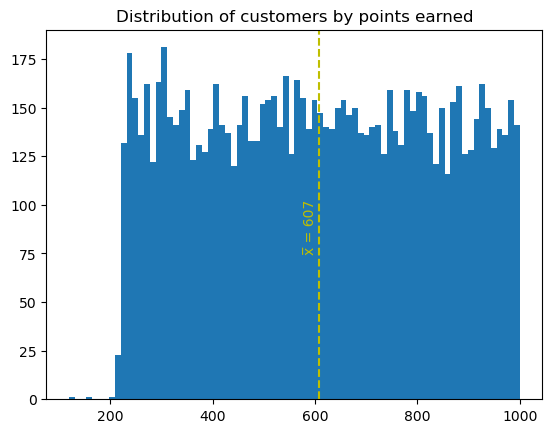

In [242]:
Point_Earned_mean = round(df['Point Earned'].mean())
ax = df['Point Earned'].hist(bins=int(df['Point Earned'].nunique()/10), grid=False);
plt.title('Distribution of customers by points earned');
ax.axvline(x=Point_Earned_mean, linestyle='dashed', c='y');
plt.text(Point_Earned_mean - 30, ax.get_ylim()[1] * 0.4, f'x̅ = {Point_Earned_mean}', c='y', rotation=90);

Points earned by customers' use of a credit card follows a relatively uniform distribution for customers that earned over about 220 points, up to the maximum of 10,000 points, with a few customers having earned less than 220. The mean is 607 points.

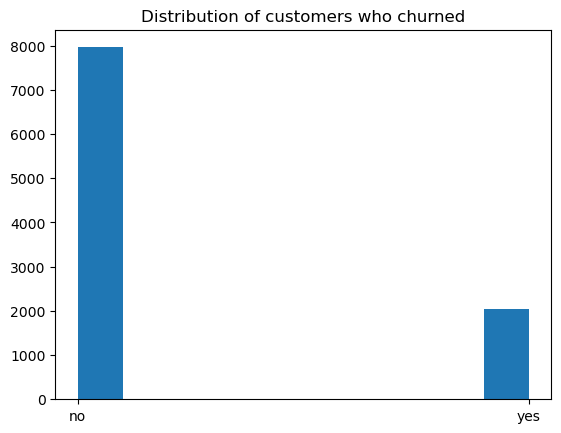

In [245]:
# Explore target variable
ax = df['Churn'].hist(grid=False);
plt.xticks([0,1])
ax.set_xticklabels(['no', 'yes'])
plt.title('Distribution of customers who churned');

About 1/5 customers churned. The goal is to reduce this to 1/10 or fewer.

## One Hot Encoding

In [248]:
# Encode Gender column strings 'Female' and 'Male' to 0 and 1 respectively
df['Gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

In [253]:
# Encode Geography and Card Type to new columns for each value with 1 for True and 0 for False
cols=['Geography', 'Card Type']
dummies = pd.get_dummies(df[cols], dtype=int)
df = pd.concat([df.drop(columns=cols), dummies], axis=1)

In [256]:
# Review cleaned dataframe
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,0,1,0,1,0,0


In [258]:
#Confirm that all data types are numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Churn               10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Geography_France    10000 non-null  int64  
 14  Geography_Germany   10000 non-null  int64  
 15  Geography_Spain     10000 non-null  int64  
 16  Card 

## Save Data

In [259]:
df.to_csv('bank_clean.csv')

## Summary

As Fairway Bank seeks to retain 10% more of its total customers next year than it did last year, this dataset provides valuable information on what factors might be important for retention. Reviewing this sample of 10,000 of Fairway's customers from last year, we saw that there were no missing values and no duplicated values. Since the provided dataset was already quite clean, most of the data wrangling was done for us. As a preliminary Exploratory Data Analysis (EDA), we looked at distributions for each of the columns via historgrams, and considered which are numeric and which are categorical. The 2 outliers we saw were in the form of columns that had extreme modes that differed from the rest of the observations. Credit Score and Balance each were bimodal with a normal distribution peak, and another peak at the minimum and maximum of these distributions respectively. Since 1/3 of customers in the dataset have a Balance of €0, while the other observations follow a normal distribution with a peak around €125.000, it is possible that the 0 represents missing values. It is also interesting that Credit Score significantly declines between 700 and 800 but then spikes again around 850. We will further examine these anomolies in EDA. Many of the distributions of other columns were fairly uniform, including Card Type, Salary, and Satisfaction Score. The Satisfaction Score column also caught our attention, as it's meant to reflect a score relative to the Complain column, but it seems to have been reported independently of whether or not the customer complained. We will investigate this further in EDA when we review correlations. The sample proportion of the target variable Churn accurately reflects the population, as about 20% of the sample customers churned, similar to Fairway's overall customer churn. This will bode well for an accurate representation of the target variable in our model. Finally, we converted all string values in categorical variables to numeric, using one hot encoding. While more exploration needs to be done to fully understand the dataset, we have clean data to proceed to EDA. Next, we will further examine distributions via box plots to get a sense of the interquartile range and a better grasp on potential outliers. We will also review a heat map and scatter plots to evaluate correlations between the features and the target variable. This will provide insights into which features might relate to one another, which might have the greatest impact on churn, and which models might best suit our classification problem. Stay tuned!